In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import matplotlib.pyplot as plt
%matplotlib inline


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/wm811k-wafer-map/LSWMD.pkl


In [14]:
df=pd.read_pickle('/kaggle/input/wm811k-wafer-map/LSWMD.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


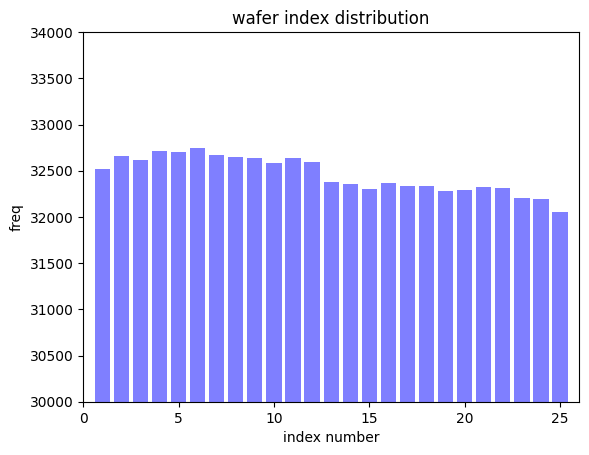

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

uni_Index=np.unique(df.waferIndex, return_counts=True)
plt.bar(uni_Index[0],uni_Index[1], color='blue', align='center', alpha=0.5)
plt.title("wafer index distribution")
plt.xlabel("index number")
plt.ylabel("freq")
plt.xlim(0,26)
plt.ylim(30000,34000)
plt.show()

In [5]:
df['failureNum']=df.failureType    #failureType를 failure num 에 할당
df['trainTestNum']=df.trianTestLabel
mapping_type={'Center':0, 'Donut':1, 'Edge-Loc':2, 'Edge-Ring':3, 'Loc':4, 'Random':5,'Scratch':6, 'Near-full':7, 'none':8}
mapping_traintest={'Training':0, 'Test':1}
df=df.replace({'failureNum':mapping_type, 'trainTestNum':mapping_traintest})
tol_wafers=df.shape[0] # 행 갯수 반환
tol_wafers

/opt/conda/lib/python3.10/site-packages/pandas/core/array_algos/replace.py:84: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  op = lambda x: operator.eq(x, b)


811457

In [6]:
df_withlabel = df[(df['failureNum']>=0) & (df['failureNum']<=8)] 
df_withlabel = df_withlabel.reset_index() 

df_withpattern = df[(df['failureNum']>=0) & (df['failureNum']<=7)] 
df_withpattern = df_withpattern.reset_index() 

df_nonpattern = df[(df['failureNum']==8)] 

df_withlabel.shape[0], df_withpattern.shape[0], df_nonpattern.shape[0] 

(172950, 25519, 147431)

/tmp/ipykernel_47/614848642.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels2)


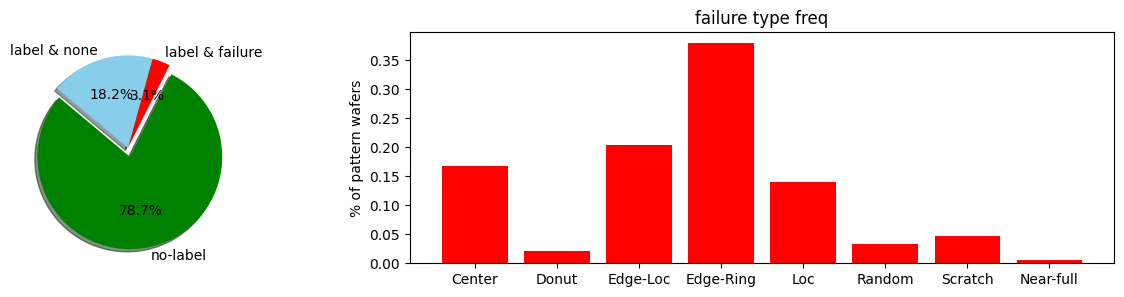

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import gridspec
figure = plt.figure(figsize=(15,3))
gridspec = gridspec.GridSpec(1, 2, width_ratios=[1,2])
ax1 = plt.subplot(gridspec[0])
ax2 = plt.subplot(gridspec[1])
no_wafers=[tol_wafers-df_withlabel.shape[0], df_withpattern.shape[0], df_nonpattern.shape[0]]
colors = ['green', 'red', 'skyblue']
explode = (0.1, 0, 0)
labels = ['no-label', 'label & failure', 'label & none']
ax1.pie(no_wafers, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
uni_pattern=np.unique(df_withpattern.failureNum, return_counts=True)
labels2=['','Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']
ax2.bar(uni_pattern[0],uni_pattern[1]/df_withpattern.shape[0], color='red', align='center', alpha=1)
ax2.set_title("failure type freq")
ax2.set_ylabel("% of pattern wafers")
ax2.set_xticklabels(labels2)
plt.show()

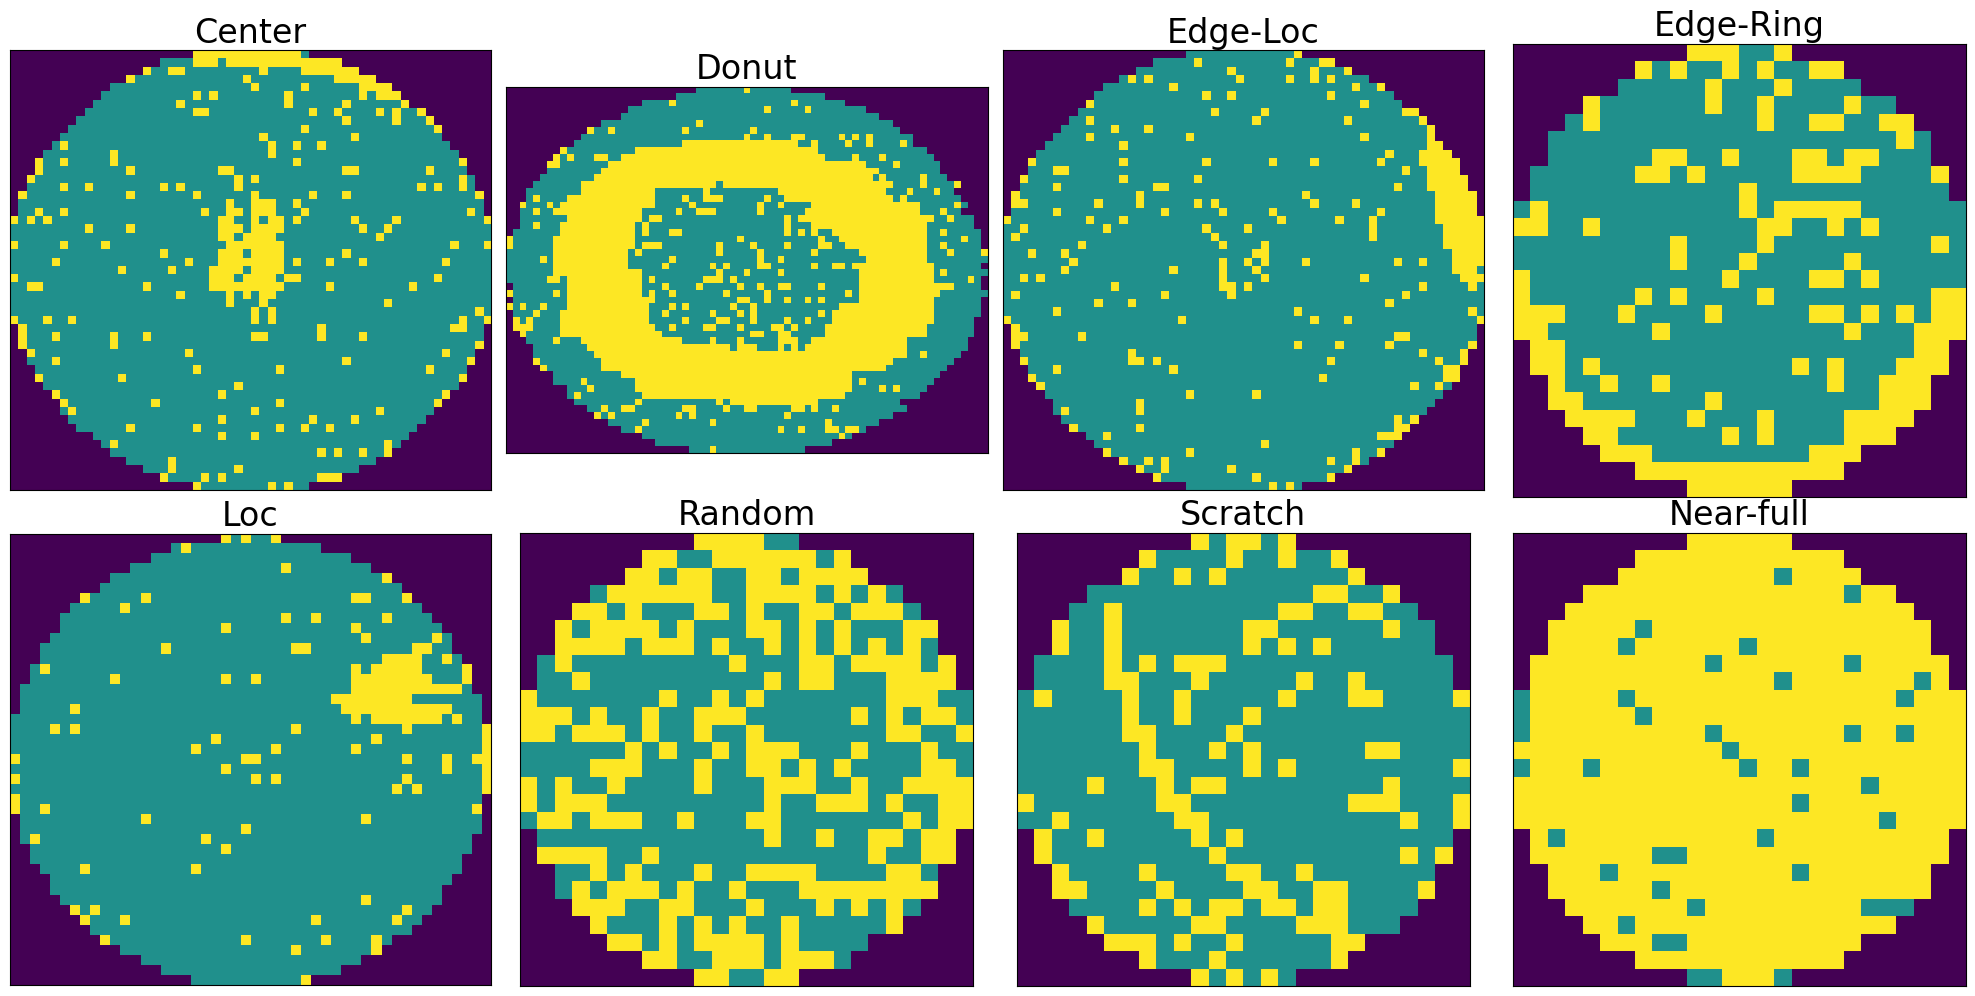

In [8]:
x=[9, 340, 3, 16, 0, 25, 84, 37]
labels2=['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']
fig,ax=plt.subplots(nrows=2, ncols=4, figsize=(20,10))
ax=ax.ravel(order='C')
for i in range(8):
    img=df_withpattern.waferMap[x[i]]
    ax[i].imshow(img)
    ax[i].set_title(df_withpattern.failureType[x[i]][0][0], fontsize=24)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show()

데이터 전처리

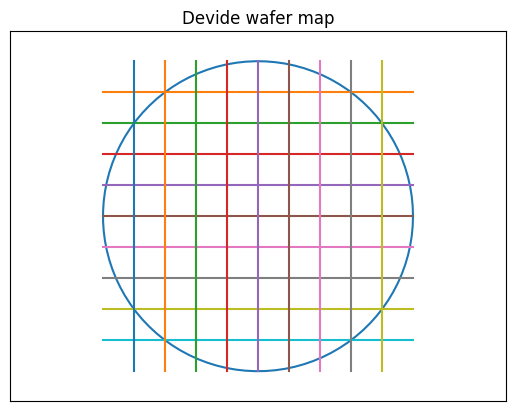

In [9]:
an=np.linspace(0, 2*np.pi, 100)
plt.plot(2.5*np.cos(an), 2.5*np.sin(an))
plt.axis('equal')
plt.axis([-4,4,-4,4])

plt.plot([-2.5, 2.5], [2.0, 2.0])
plt.plot([-2.5, 2.5], [1.5, 1.5])
plt.plot([-2.5, 2.5], [1.0, 1.0])
plt.plot([-2.5, 2.5], [0.5, 0.5 ])
plt.plot([-2.5, 2.5], [0, 0])
plt.plot([-2.5, 2.5], [-0.5, -0.5 ])
plt.plot([-2.5, 2.5], [-1.0, -1.0 ])
plt.plot([-2.5, 2.5], [-1.5,-1.5 ])
plt.plot([-2.5, 2.5], [-2.0,-2.0])

plt.plot([-2.0, -2.0], [-2.5, 2.5])
plt.plot([-1.5, -1.5], [-2.5, 2.5])
plt.plot([-1.0, -1.0], [-2.5, 2.5])
plt.plot([-0.5, -0.5], [-2.5, 2.5])
plt.plot([0, 0], [-2.5, 2.5])
plt.plot([0.5, 0.5], [-2.5, 2.5])
plt.plot([1.0, 1.0], [-2.5, 2.5])
plt.plot([1.5, 1.5], [-2.5, 2.5])
plt.plot([2.0, 2.0], [-2.5, 2.5])

plt.title("Devide wafer map")
plt.xticks([]) # 축 없애기
plt.yticks([])
plt.show()

In [10]:
def cal_den(x):
    return 100*(np.sum(x==2)/np.size(x))  

def find_regions(x):
    rows=np.size(x,axis=0)
    cols=np.size(x,axis=1)
    ind1=np.arange(0,rows,rows//10)
    ind2=np.arange(0,cols,cols//10)
    
    reg1=x[:,ind2[0]:ind2[1]]
    reg2=x[:ind1[1], ind2[2]:ind2[8]]
    reg3=x[:,ind2[0]:]
    reg4=x[ind1[9]:,:]
    
    reg5=x[ind1[1]:ind1[4], ind2[1]:ind2[2]]
    reg6=x[ind1[5]:ind1[9],ind2[1]:ind2[2]]
    reg7=x[ind1[1]:ind1[2],ind2[2]:ind2[5]]
    reg8=x[ind1[8]:ind1[9],ind2[2]:ind2[5]]
    reg9=x[ind1[1]:ind1[2],ind2[5]:ind2[8]]
    reg10=x[ind1[8]:ind1[9],ind2[5]:ind2[8]]
    reg11=x[ind1[2]:ind1[5],ind2[8]:ind2[9]]
    reg12=x[ind1[5]:ind1[9],ind2[8]:ind2[9]] 


    fea_reg_den = []
    fea_reg_den = [cal_den(reg1),cal_den(reg2),cal_den(reg3),cal_den(reg4),cal_den(reg5),cal_den(reg6),cal_den(reg7),cal_den(reg8),cal_den(reg9),cal_den(reg10),cal_den(reg11),cal_den(reg12)]
    return fea_reg_den


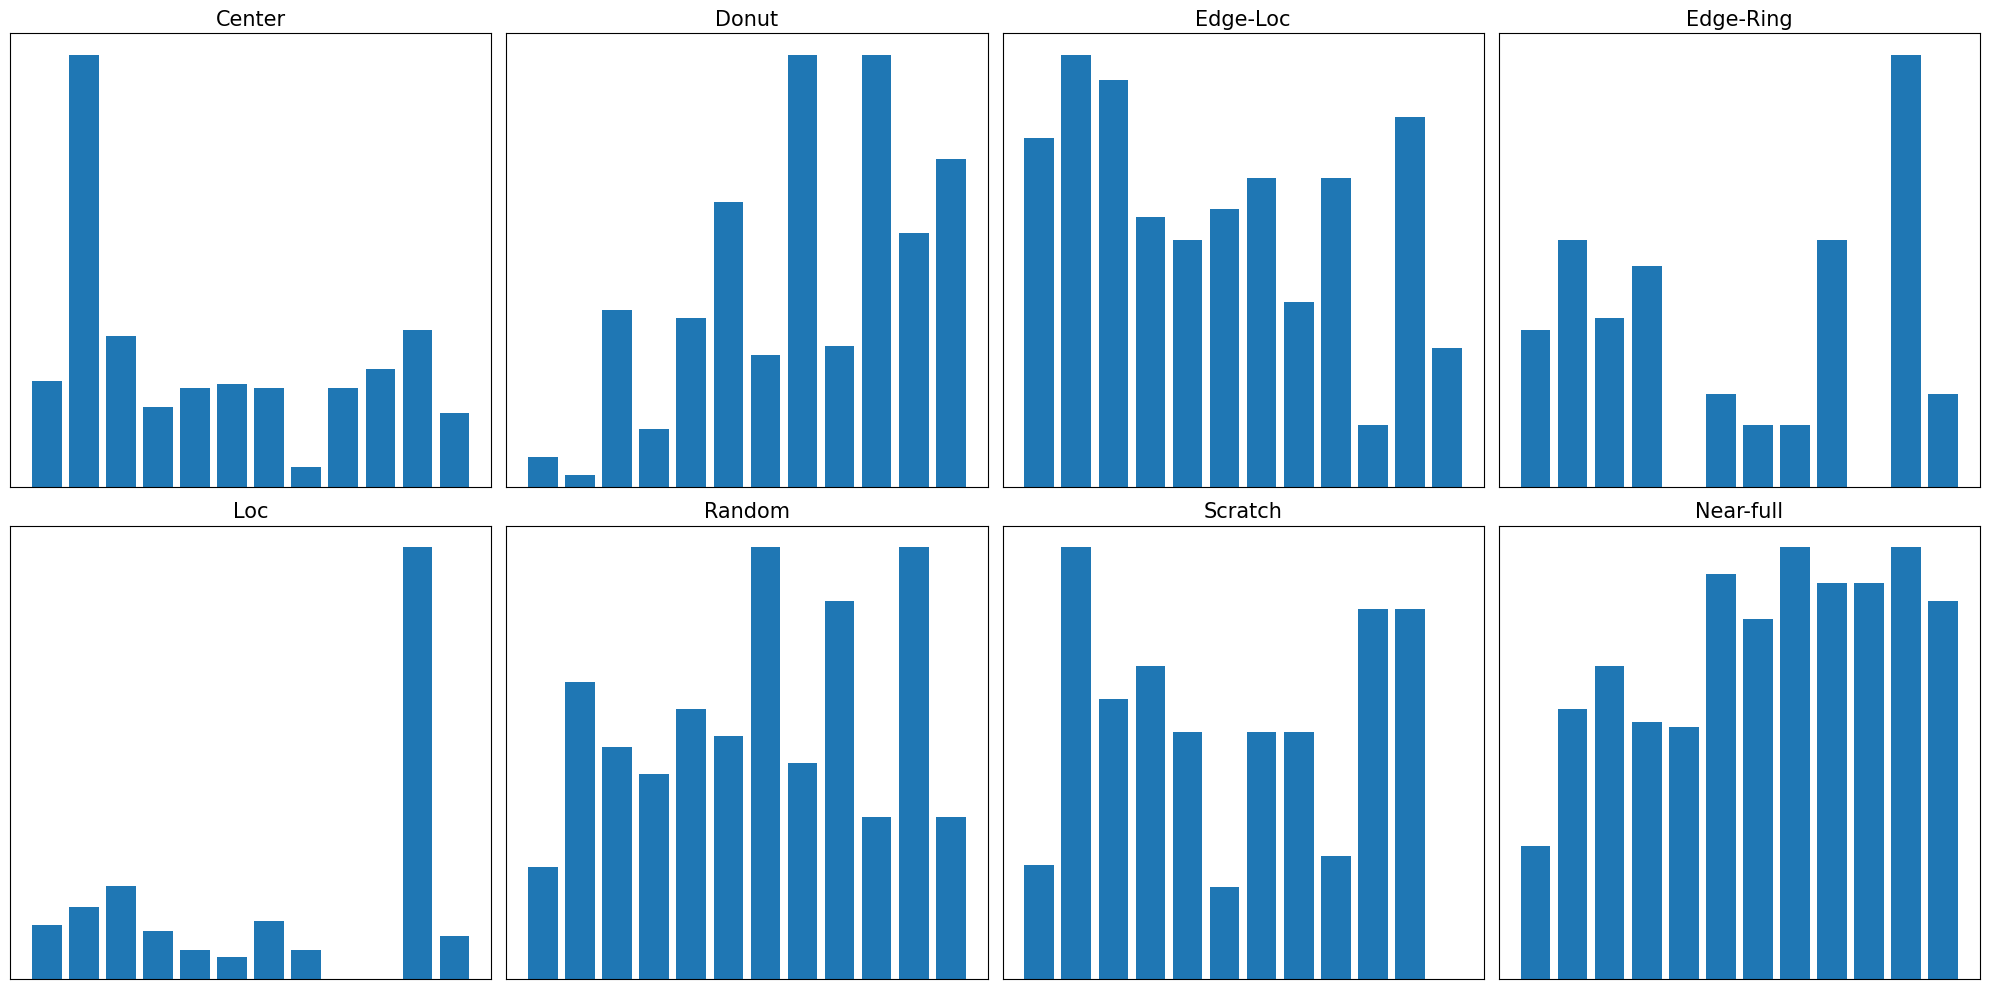

In [11]:
df_withpattern['fea_reg']=df_withpattern.waferMap.apply(find_regions)
x = [9,340, 3, 16, 0, 25, 84, 37]
labels2 = ['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']
fig, ax = plt.subplots(nrows = 2, ncols = 4,figsize=(20, 10))
ax = ax.ravel(order='C')
for i in range(8):
    ax[i].bar(np.linspace(1,12,12),df_withpattern.fea_reg[x[i]])
    ax[i].set_title(df_withpattern.failureType[x[i]][0][0],fontsize=15)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show() 